<a href="https://colab.research.google.com/github/fsuarez013/Proyecto-Integrador-Cs.-de-Datos/blob/main/Modelo_Predictivo_para_la_Evaluaci%C3%B3n_del_Riesgo_Crediticio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **TABLA DE CONTENIDOS**

---

    1. Librerias
    2. Carga de Datos
    3. Analisis y Procesamiento de Datos
        3.1. Analisis del dataset
        3.2. Procesamiento de datos
        3.3. Visualizacion de datos
            A). Analisis Univariable
            B). Analisis Bivariable
        3.4. Transformacion variables categoricas en numericas
        3.5. Correlacion de datos
    4. Explicacion de las variables a predecir
    5. Analisis de variable Default (Moroso / No Moroso)
    6. Detalle de los modelos a aplicar
        6.1. LOGISTIC REGRESSION
        6.2. DECISION TREE
        6.3. RANDOM FOREST
        6.4. ARTIFICIAL NEURAL NETWORK (ANN)
    7. Entrenamiento de los modelos
    8. Analisis de variable Calificacion Crediticia
    9. Detalle de los modelos a aplicar
        9.1. LOGISTIC REGRESSION
        9.2. DECISION TREE
        9.3. RANDOM FOREST
        9.4. K-NEAREST NEIGHBORS (KNN)
        9.5. GAUSSIAN NAIVE BAYES
        9.6. GRADIENT BOOSTING CLASSIFIER
        9.7. XGB CLASSIFIER MODEL
    10. Entrenamiento de los modelos
    11. Conclusiones
        

### **1) - LIBRERIAS**

---

In [1]:
# Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.2f}'.format

### **2) - CARGA DE DATOS**

---

Vamos a utilizar el conjunto de datos reales de una entidad financiera. El conjunto de datos contiene información de 47542 observaciones con 10 columnas de información.

El conjunto de datos que será estudiado contiene los siguientes atributos:

* **Solicitud** - Cada solicitud tiene un numero asignado de manera aleatoria (numérico)
* **Fecha** - Fecha de consulta (numérico)
* **Genero** -texto: masculino, femenino
* **Producto** - Nombre de los diferentes productos que maneja la entidad (numérico: 'Crédito’: 1, 'Reporte’: 2, 'Alquiler’: 3, 'Personal’: 4, 'Informe Comercial’: 5)
* **Estado Solicitud** - texto: por default es "Finalizada"
* **Calificación de Riesgo** - Asociado a su Comportamiento Crediticio. Estos son los distintos valores que queremos predecir (Calificación dividida en 7 ítems).
* **Score** - Puntaje crediticio, es un número de 3 dígitos que registra toda tu actividad financiera de crédito.
* **PNP** (pasa/no pasa) - Análisis de prefactibilidad previo (Resultado: SI - Moroso / NO - No Moroso)
* **Viabilidad** - ídem PNP, en base al análisis de prefactibilidad determinamos el incumplimiento, la respuesta se obtiene en binario (1 - Moroso / 0 - No Moroso)
* **BCRA** - historial del endeudamiento. Es de tipo entero donde podemos tener valores del 1 al 5. Se asocia estos valores numéricos con su equivalente a niveles de riesgo ('Riesgo Alto’= 5 y 4, 'Riesgo Medio’= 3, 'Riesgo Bajo’= 2, 'Normal', 'Bueno', 'Muy Bueno' = 1)







In [2]:
from google.colab import files
uploaded = files.upload()

Saving Dataframe Riesgo Credito.xlsx to Dataframe Riesgo Credito.xlsx


In [3]:
# Leemos el archivo excel
df = pd.read_excel("Dataframe Riesgo Credito.xlsx")
df

,N° Solicitud,Fecha,Genero,Producto,Estado Solicitud,Calificacion,Score,PNP,Viabilidad,Bcra
0,51628,26/07/2022,F,Credito,Finalizada,Riesgo Bajo,410,NO,1,2
1,51627,26/07/2022,F,Reporte,Finalizada,Bueno,570,SI,0,1
2,51626,26/07/2022,F,Reporte,Finalizada,Calificable,0,SI,0,1
3,51625,26/07/2022,M,Reporte,Finalizada,Riesgo Bajo,433,NO,1,2
4,51624,26/07/2022,F,Reporte,Finalizada,Riesgo Alto,254,NO,1,4
...,...,...,...,...,...,...,...,...,...,...
47537,30985,03/02/2021,M,Credito,Finalizada,Riesgo Bajo,436,NO,1,2
47538,23258,08/07/2020,M,Credito,Finalizada,Calificable,0,SI,0,1
47539,23257,08/07/2020,F,Credito,Finalizada,Calificable,0,SI,0,1
47540,20701,16/03/2020,M,Credito,Finalizada,Riesgo Alto,236,NO,1,5


In [4]:
# Mostramos la cantidad de filas y columnas
print('Cantidad de Filas y columnas:',df.shape)

Cantidad de Filas y columnas: (47542, 10)


### **3) - ANALISIS Y PROCESAMIENTO DE DATOS**

---

En esta sección revisaremos la forma que tiene los datos y buscaremos características importantes basados en análisis descriptivo y visual.

Antes de proceder con el modelo, es muy importante la exploración y el saneamiento de los datos. Este es un paso muy importante, ya que consiste en hacer que los datos sean compatibles con el modelo y puedan emplearse para entrenarlo.

También, resulta importante conocer el número de valores ausentes, es decir, saber que filas no completan todas las columnas de datos. Estos valores ausentes o nulos, si no son detectados pueden afectar gravemente al modelo de predicción. Por esta razón, es muy importante asegurar que el conjunto de datos no contenga ninguno. 

### **3.1) - Analisis del dataset**

Cada columna tiene un tipo de dato. Esto podemos verlo con la función info()

In [5]:
# vemos las columnas, el total de filas y los tipos de datos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47542 entries, 0 to 47541
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   N° Solicitud      47542 non-null  int64 
 1   Fecha             47542 non-null  object
 2   Genero            47542 non-null  object
 3   Producto          47542 non-null  object
 4   Estado Solicitud  47542 non-null  object
 5   Calificacion      47542 non-null  object
 6   Score             47542 non-null  int64 
 7   PNP               47542 non-null  object
 8   Viabilidad        47542 non-null  int64 
 9   Bcra              47542 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 3.6+ MB


A continuación vemos la información estadística básica de nuestro set de datos:  La Media, el desvío estándar, valores mínimo y máximo de cada característica.

In [6]:
# Descripción estadística de los datos numéricos(cantidad, media, desvío estándar, valores máximo y mínimo)
df.describe()

,N° Solicitud,Score,Viabilidad,Bcra
count,47542.00,47542.00,47542.00,47542.00
mean,26202.81,406.78,0.38,1.97
std,14840.03,232.25,0.48,1.43
min,29.00,0.00,0.00,1.00
25%,13522.25,249.00,0.00,1.00
50%,26354.50,449.00,0.00,1.00
75%,39014.75,595.00,1.00,3.00
max,51628.00,888.00,1.00,5.00


El metodo .dtypes devuelve una Series con los tipos de datos de cada columna del DataFrame. 

En donde se puede ver que las cadenas de texto son de tipo objeto y los valores numéricos enteros de 64 bits.

In [7]:
# Comprobar cuales son los tipos de datos de este objeto
df.dtypes

N° Solicitud         int64
Fecha               object
Genero              object
Producto            object
Estado Solicitud    object
Calificacion        object
Score                int64
PNP                 object
Viabilidad           int64
Bcra                 int64
dtype: object

In [8]:
# Obtener el número de registros nulos por columna
df.isnull().sum()

N° Solicitud        0
Fecha               0
Genero              0
Producto            0
Estado Solicitud    0
Calificacion        0
Score               0
PNP                 0
Viabilidad          0
Bcra                0
dtype: int64

En este caso, el análisis hecho a los datos no muestra ningún valor nulo. 

In [9]:
# Obtener los valores únicos de un lista de valores.
df.nunique()

N° Solicitud        47541
Fecha                1272
Genero                  2
Producto                5
Estado Solicitud        1
Calificacion            7
Score                 315
PNP                     2
Viabilidad              2
Bcra                    5
dtype: int64

In [10]:
# Verificar si existen valores duplicados
df.duplicated().sum()

1

### **3.2) - Procesamiento de Datos**

En este punto realizamos dos tareas:

* Se eliminan las columnas innecesarias, que no aportan valor.
* Se renombran las columnas "Viabilidad" y "Bcra".

In [11]:
# Eliminamos las columnas innecesarias 
df = df.drop(['N° Solicitud', 'Fecha', 'Estado Solicitud', 'PNP'], axis = 1)
df.head()

,Genero,Producto,Calificacion,Score,Viabilidad,Bcra
0,F,Credito,Riesgo Bajo,410,1,2
1,F,Reporte,Bueno,570,0,1
2,F,Reporte,Calificable,0,0,1
3,M,Reporte,Riesgo Bajo,433,1,2
4,F,Reporte,Riesgo Alto,254,1,4


In [12]:
# Renombramos las columnas
df = df.rename(columns={"Viabilidad":"Default","Bcra":"Riesgo"})
df.head()
# df = df.rename({"Viabilidad":"Default","Bcra":"Riesgo"}, axis=1)

,Genero,Producto,Calificacion,Score,Default,Riesgo
0,F,Credito,Riesgo Bajo,410,1,2
1,F,Reporte,Bueno,570,0,1
2,F,Reporte,Calificable,0,0,1
3,M,Reporte,Riesgo Bajo,433,1,2
4,F,Reporte,Riesgo Alto,254,1,4


### **3.3) - Visualización de Datos**

Antes de empezar a procesar el conjunto de datos, vamos a hacer unas visualizaciones que muchas veces nos pueden ayudar a comprender mejor las características de la información con la que trabajamos y su correlación. 

1.   Haremos un **Analisis Univariable**, que permite estudiar el comportamiento de las variables de forma individual. Primero se realiza el analisis de la variable a predecir, mostrando la cantidad de datos dividida en 0 (No Moroso) y 1(Moroso) y sus respectivos porcentajes y luego los demas Features de
entrada.

2.   Haremos un **Analisis Bivariable** donde describimos y evaluamos la relación entre dos variables o el comportamiento de una variable en función de la variable objetivo.



**3.3.a) - Analisis Univariable**

In [13]:
# calcular proporciones de morosos y no morosos del dataset
df_count = pd.DataFrame()
df_count["Riesgo"] =["NO","SI"]
df_count["Total"] = df["Default"].value_counts() 
df_count["Porcentaje"] = 100*df_count["Total"] /df_count["Total"] .sum()

df_count

,Riesgo,Total,Porcentaje
0,NO,29590,62.24
1,SI,17952,37.76


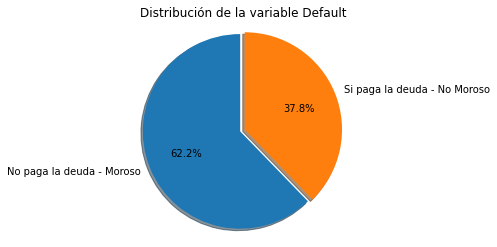

In [16]:
# Graficamos la cantidad de morosos y no morosos del dataset
target_cero = df[df['Default']==0]['Default'].count()
target_uno  = df[df['Default']==1]['Default'].count()

labels = 'No paga la deuda - Moroso', 'Si paga la deuda - No Moroso'
sizes = [target_cero, target_uno]
explode = (0.05, 0) 

plt.title("Distribución de la variable Default")
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90 )
plt.axis('equal') 

plt.show()

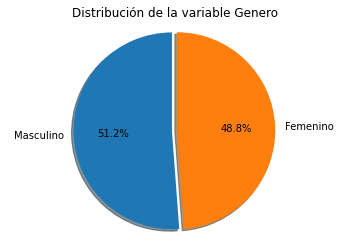

In [17]:
# Graficamos la cantidad de personas masculinas y femeninas del dataset(Variable Genero)
target_cero = df[df['Genero']=="M"]['Genero'].count()
target_uno  = df[df['Genero']=="F"]['Genero'].count()

labels = 'Masculino', 'Femenino'
sizes = [target_cero, target_uno]
explode = (0.05, 0) 

plt.title("Distribución de la variable Genero")
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90 )
plt.axis('equal') 

plt.show()

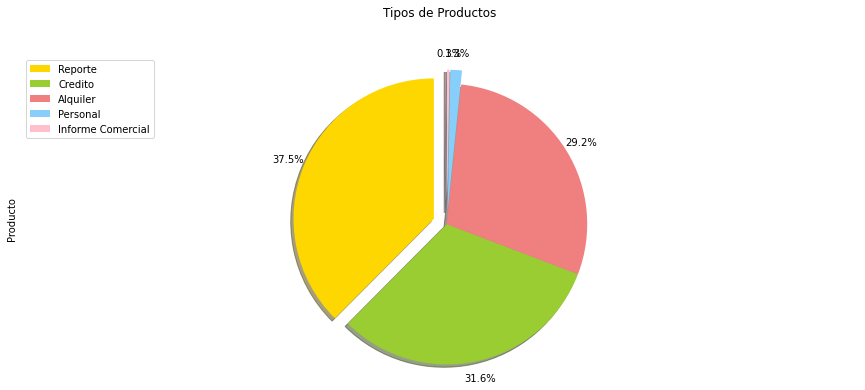

In [18]:
# Distribucion de cada tipo de producto (Variable Producto)
color_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'pink']
explode_list = [0.1, 0, 0, 0.1, 0.1]
df['Producto'].value_counts().plot(kind='pie',
                                    figsize=(15, 6),
                                    autopct='%1.1f%%',
                                    startangle=90,
                                    shadow=True,
                                    labels=None,
                                    pctdistance=1.12,
                                    colors=color_list,
                                    explode=explode_list
                                    )

plt.title('Tipos de Productos', loc='center', y=1.1)
plt.axis('equal')
plt.legend(labels=df["Producto"].value_counts().index , loc='upper left')

plt.show()

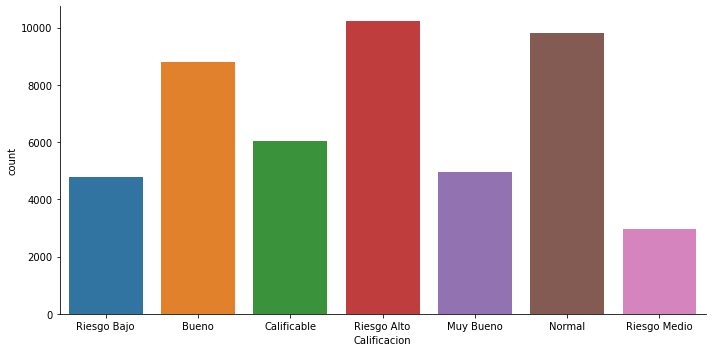

In [19]:
sns.factorplot('Calificacion',data=df,kind="count", aspect=2)

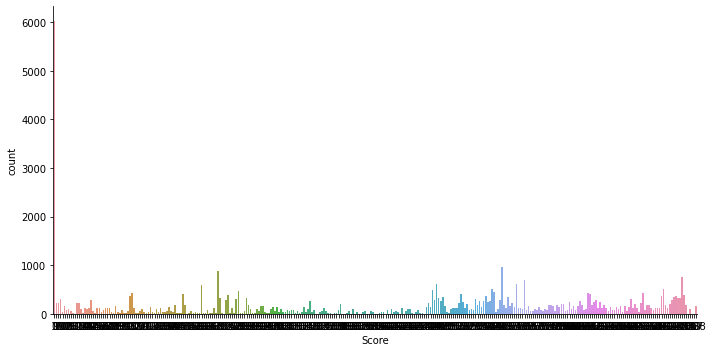

In [ ]:
sns.factorplot('Score',data=df,kind="count", aspect=2)

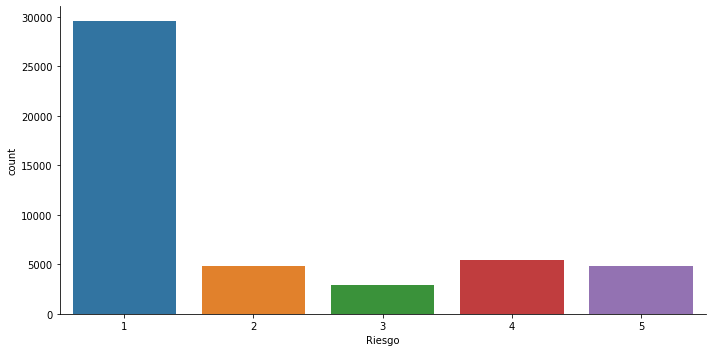

In [20]:
sns.factorplot('Riesgo',data=df,kind="count", aspect=2)

**3.3.b) - Analisis Bivariable**

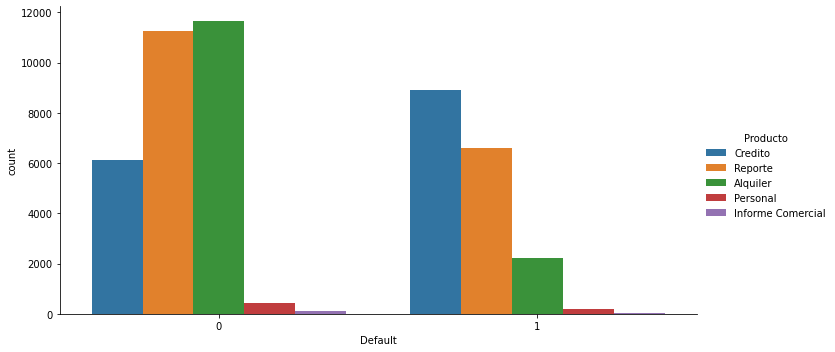

In [21]:
sns.factorplot('Default',data=df,hue='Producto',kind="count", aspect=2)
# este muestra los 0 y 1 de la columna "Default"

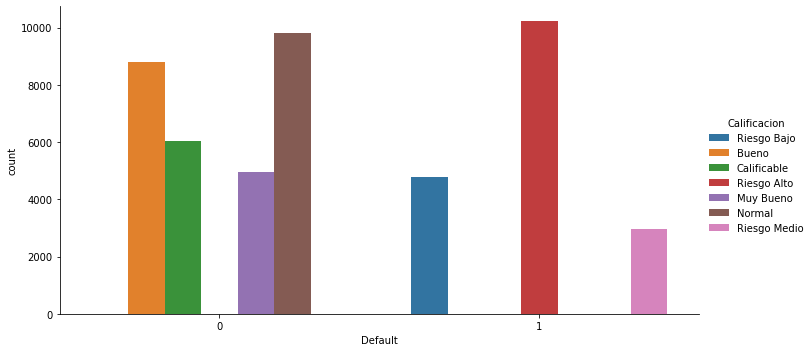

In [22]:
sns.factorplot('Default',data=df,hue='Calificacion',kind="count", aspect=2)

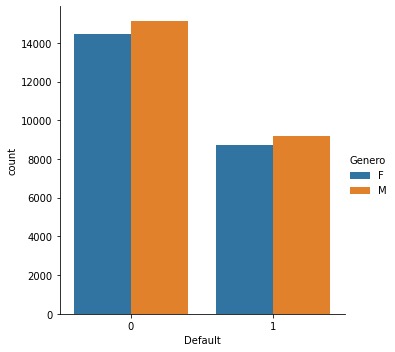

In [23]:
sns.factorplot('Default',data=df,hue='Genero',kind="count", aspect=1)

### **3.4) - Transformar variables de categoricas a numericas**

La idea es identificar los distintos valores existentes y sustituir cada uno de ellos por un número, para ello utilizamos el metodo denominado **Label Encoding.**


**3.4.a) - Agrupar valores de la variable Score**

Agrupamos valores de la variable "Score" en una nueva variable denominada "Scoring".

Se agruparan datos en tres rangos: No Bancarizado (Score = 0) / No Moroso( Score 450 a 999) y Moroso (Score 1 a 449) asignandole los valores numericos: 2 (No Bancarizado), 0 (No Moroso) y 1 (Moroso).

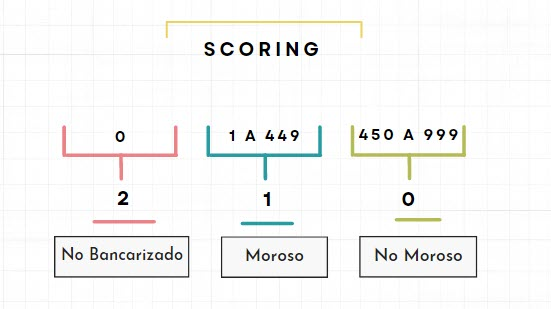

Este agrupamiento puede mejorar la precisión de los modelos predictivos y, a su vez, puede mejorar la comprensión de la distribución de los datos.




In [24]:
# Vemos previamente la cantidad de elementos de cada score
df.groupby('Score').size()

Score
0      6023
1       224
99      232
100     313
102      27
       ... 
765       1
770     106
789       1
867       1
888     156
Length: 315, dtype: int64

In [25]:
# Agrupamos valores de la variable Score en una nueva variable denominada Scoring
from sklearn.preprocessing import LabelEncoder

def score_func(x):
    # if x['Score'] <= 0 : return 'No Bancarizado'
    if x['Score'] >1 and (x['Score'] <= 449): return 1 # 'Moroso'
    elif x['Score'] >450 and (x['Score'] <= 999): return 0 # 'No Moroso'
    else: return 2 # 'No Bancarizado'

df['Scoring'] = df.apply(score_func, axis = 1)

In [26]:
# Corroboramos que con este cambio no queden valores sin imputar
df.isnull().sum()

Genero          0
Producto        0
Calificacion    0
Score           0
Default         0
Riesgo          0
Scoring         0
dtype: int64

In [27]:
df.head()

,Genero,Producto,Calificacion,Score,Default,Riesgo,Scoring
0,F,Credito,Riesgo Bajo,410,1,2,1
1,F,Reporte,Bueno,570,0,1,0
2,F,Reporte,Calificable,0,0,1,2
3,M,Reporte,Riesgo Bajo,433,1,2,1
4,F,Reporte,Riesgo Alto,254,1,4,1


In [28]:
# Eliminamos las columnas Score
df = df.drop(['Score'], axis = 1)

**3.4.b) - Transformamos las Variables "Calificacion", "Genero" y "Producto" en variables numericas**.

In [29]:
# Map the atribute into ordinal numbers from 1-7 - varable Calificacion
scale_mapper = {'Riesgo Alto' : 1, 'Riesgo Medio' : 2, 
'Riesgo Bajo' : 3, 'Calificable' : 4, 'Normal' : 5, 'Bueno' : 6, 'Muy Bueno' : 7}

df['Calificacion'] = df['Calificacion'].replace(scale_mapper)

In [30]:
df.groupby('Calificacion').size()

Calificacion
1    10226
2     2945
3     4781
4     6023
5     9819
6     8810
7     4938
dtype: int64

In [35]:
le=LabelEncoder()
df['Genero']=le.fit_transform(df['Genero'])

In [36]:
df['Genero'].unique()
# F = 0 / M = 1

array([0, 1])

In [32]:
#Map the atribute into ordinal numbers from 1-5 - variable Producto
scale_mapper = {'Credito' : 1, 'Reporte' : 2, 
'Alquiler' : 3, 'Personal' : 4, 'Informe Comercial' : 5}

df['Producto'] = df['Producto'].replace(scale_mapper)

In [33]:
df.groupby('Producto').size()

Producto
1    15047
2    17851
3    13870
4      633
5      141
dtype: int64

In [37]:
df.head()

,Genero,Producto,Calificacion,Default,Riesgo,Scoring
0,0,1,3,1,2,1
1,0,2,6,0,1,0
2,0,2,4,0,1,2
3,1,2,3,1,2,1
4,0,2,1,1,4,1


### **3.5) - Correlacion de datos**

Verifiquemos si hay correlación entre los datos del dataset. Para ello, utilizamos el método corr() que nos devuelve la Correlacion de Pearson que indica la correlación lineal entre dos variables.

In [38]:
df.corr()

,Genero,Producto,Calificacion,Default,Riesgo,Scoring
Genero,1.00,-0.00,-0.00,0.00,0.01,0.01
Producto,-0.00,1.00,0.32,-0.33,-0.27,-0.13
Calificacion,-0.00,0.32,1.00,-0.89,-0.89,-0.62
Default,0.00,-0.33,-0.89,1.00,0.87,0.41
Riesgo,0.01,-0.27,-0.89,0.87,1.00,0.36
Scoring,0.01,-0.13,-0.62,0.41,0.36,1.00


In [39]:
# correlacion entre variables predictoras y variable objetivo
df.corr()[['Default']]

,Default
Genero,0.00
Producto,-0.33
Calificacion,-0.89
Default,1.00
Riesgo,0.87
Scoring,0.41


In [40]:
df.corr()[['Calificacion']]

,Calificacion
Genero,-0.00
Producto,0.32
Calificacion,1.00
Default,-0.89
Riesgo,-0.89
Scoring,-0.62


In [41]:
# mostrar correlacion entre variables en mapa de calor
corr_mat = df.corr(method="pearson")
corr_mat.style.background_gradient(cmap='coolwarm')

,Genero,Producto,Calificacion,Default,Riesgo,Scoring
Genero,1.000000,-0.003962,-0.001665,0.001847,0.005420,0.006460
Producto,-0.003962,1.000000,0.315769,-0.333835,-0.274232,-0.125362
Calificacion,-0.001665,0.315769,1.000000,-0.886189,-0.891850,-0.616790
Default,0.001847,-0.333835,-0.886189,1.000000,0.870751,0.408114
Riesgo,0.005420,-0.274232,-0.891850,0.870751,1.000000,0.357371
Scoring,0.006460,-0.125362,-0.616790,0.408114,0.357371,1.000000


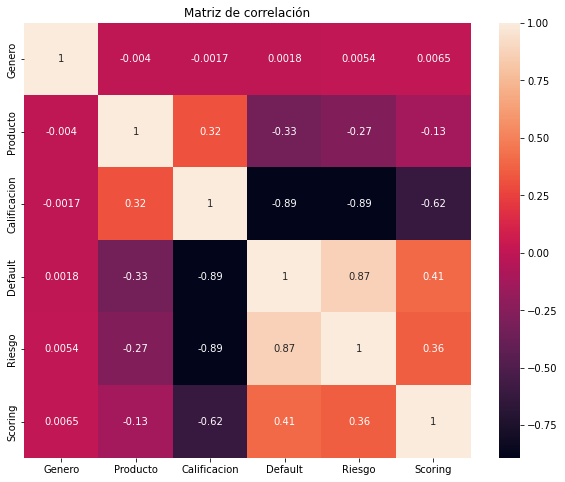

In [42]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True)
plt.title("Matriz de correlación")
plt.show()

### **4) - EXPLICACION DE LAS VARIABLES A PREDECIR**

El objetivo principal de este trabajo es implementar un Modelo de Análisis Predictivo que permita estimar las probabilidades de incumplimiento del cliente y contribuir a reducir los niveles de riesgo de crédito a través de la calificación crediticia de los clientes.

Para ello se desea realizar dos evaluaciones en el modelo:

* 1 – Medir la viabilidad de otorgamiento del crédito, es decir, determinar si es VIABLE (no deudor) / NO VIABLE (deudor). 

* 2-  Obtener una calificación de riesgo como resultado de la comparativa entre: Historial Endeudamiento (BCRA) + Score + Calificación + Default (Obtenida En El Punto 1)

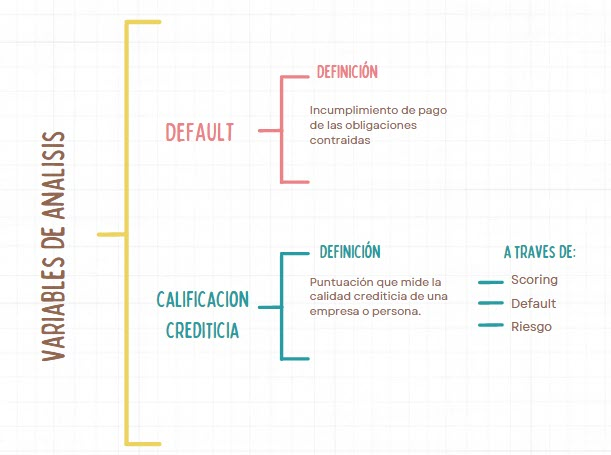


### **5) - ANALISIS DE LA VARIABLE TARGET: "DEFAULT"**

En esta primera etapa, realizamos el analisis de Viabilidad, a fin de determinar si una persona es morosa o no.

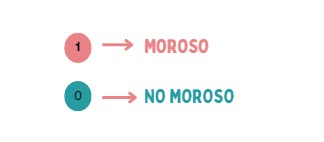

Para este analisis utilizamos como:

*  **Variables Predictoras (X):**  a las columnas: **'Genero','Producto','Calificacion','Scoring'** 

*  **Variable Dependiente (Y):**  a la columna: **'Default'**

### **6) - DETALLE DE LOS MODELOS A APLICAR**

---

Utilizaremos modelos de clasificación y regresion. En específico se seleccionan:

    9.1. Regresion Logistica
    9.2. Arbol de Decision
    9.3. Random Forest
    9.4. KNN
    9.5. Red Neuronal

* La **Regresion Logistica** es un tipo de análisis de regresión utilizado para predecir el resultado de una variable categórica en función de las variables independientes o predictoras.

* Los **Arboles de Decisión** son modelos predictivos formados por reglas binarias (si/no) con las que se consigue repartir las observaciones en función de sus atributos y predecir así el valor de la variable respuesta.

* El modelo **Random Forest** es una combinación de árboles predictores tal que cada árbol depende de los valores de un vector aleatorio probado independientemente y con la misma distribución para cada uno de estos.

* El algoritmo **KNN** es un clasificador de aprendizaje supervisado no paramétrico, que utiliza la proximidad para hacer clasificaciones o predicciones sobre la agrupación de un punto de datos individual.

* Una **Red Neuronal** está compuesta por un conjunto de neuronas interconectadas entre sí mediante enlaces. Cada neurona toma como entradas las salidas de las neuronas de las capas antecesoras, cada una de esas entradas se multiplica por un peso, se agregan los resultados parciales y mediante una función de activación se calcula la salida. Esta salida es a su vez es entrada de la neurona a la que precede.

### **7) - ENTRENAMIENTO DEL MODELO**

La etapa de entrenamiento de un modelo es muy importante, ya que es ahí donde el sistema aprende los patrones que están presentes en los datos, para ello, se dividen los datos aleatoriamente donde una parte se utiliza para la creación del modelo y otra para la comprobación de calidad de este. Esta división se conoce como datos de prueba y datos de entrenamiento. 

En este caso, el 70% de los datos se ha utilizado para entrenar el modelo y el 30% restante como datos de prueba.

**Feature Selection** 

Definición de las variables de entrada (Features) y variable objetivo (Target)

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

sc = StandardScaler()
X = df[['Genero','Producto','Calificacion','Scoring']].values
X = sc.fit_transform(X)
y = df['Default'].values

In [45]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [46]:
print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

Number transactions train dataset:  33279
Number transactions test dataset:  14263
Total number of transactions:  47542


In [47]:
def model(classifier):
    
    classifier.fit(X_train,y_train)
    prediction = classifier.predict(X_test)
    print("ACCURACY : ",'{0:.2%}'.format(accuracy_score(y_test,prediction))) 
    print("CROSS VALIDATION SCORE : ",'{0:.2%}'.format(cross_val_score(classifier,X_train,y_train,cv = 10,scoring = 'accuracy').mean()))
    print("ROC_AUC SCORE : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, X_test,y_test)
    plt.title('ROC_AUC_PLOT')
    plt.show()

In [48]:
def model_evaluation(classifier):
    
    # CONFUSION MATRIX
    cm = confusion_matrix(y_test,classifier.predict(X_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    tn,fp,fn,tp = cm.flatten()
    
    # PRECISION
    print('PRECISION : ','{0:.2%}'.format(tp/(tp + fp)))
    
    # RECALL
    print('RECALL : ','{0:.2%}'.format(tp/(tp + fn)))

In [49]:
def grid_search_cv(classifier,hyperparameters):
    
    GSCV = GridSearchCV(classifier,hyperparameters,cv = 10)
    model = GSCV.fit(X_test,y_test)
    print(model)
    print('HIGHEST ACCURACY : ','{0:.2%}'.format(model.best_score_))
    print('BEST PARAMETERS : ',model.best_params_)

**Logistic Regression**

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2') 

ACCURACY :  100.00%
CROSS VALIDATION SCORE :  100.00%
ROC_AUC SCORE :  100.00%


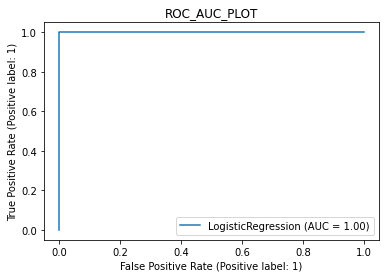

In [52]:
model(classifier_lr)

PRECISION :  100.00%
RECALL :  100.00%


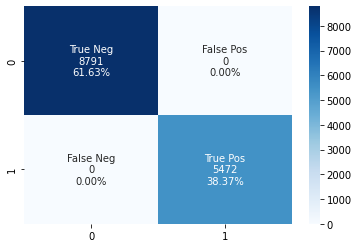

In [53]:
model_evaluation(classifier_lr)

**Decision Tree**

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
classifier_dt = DecisionTreeClassifier(criterion = 'entropy')

ACCURACY :  100.00%
CROSS VALIDATION SCORE :  100.00%
ROC_AUC SCORE :  100.00%


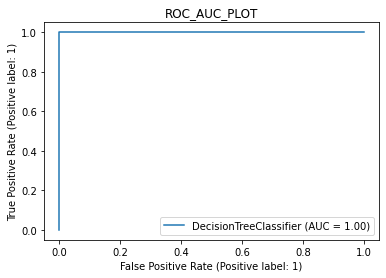

In [56]:
model(classifier_dt)

PRECISION :  100.00%
RECALL :  100.00%


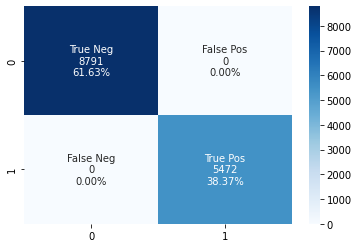

In [57]:
model_evaluation(classifier_dt)

**Visualization Decision Tree**

In [58]:
from sklearn import tree

In [59]:
text_representation = tree.export_text (classifier_dt)
print (text_representation)

|--- feature_2 <= -0.25
|   |--- class: 1
|--- feature_2 >  -0.25
|   |--- class: 0



In [60]:
with open ("description_tree.log", "w") as fout:
    fout.write(text_representation)

**Plot Tree with plot_tree**

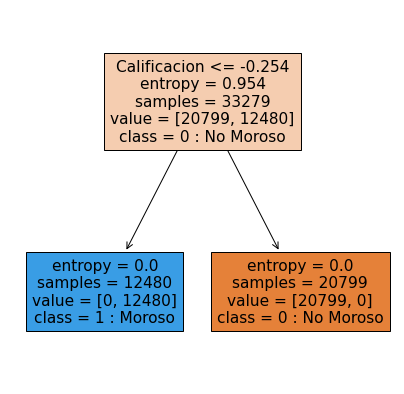

In [62]:
feature_names = ['Scoring', 'Genero', 'Calificacion', 'Producto'] # feature_names = ['No Moroso','Moroso']
target_names = ['0 : No Moroso', '1 : Moroso']
fig= plt.figure(figsize=(7,7))
Plot = tree.plot_tree(classifier_dt,
                      feature_names= feature_names,
                      class_names = target_names,
                      filled = True)
fig.savefig('Tree1.png')

**Random Forest**

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
classifier_rf = RandomForestClassifier(max_depth = 2,random_state = 0)

ACCURACY :  100.00%
CROSS VALIDATION SCORE :  100.00%
ROC_AUC SCORE :  100.00%


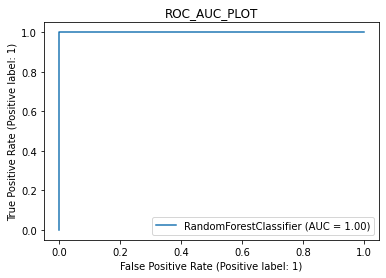

In [65]:
model(classifier_rf)

PRECISION :  100.00%
RECALL :  100.00%


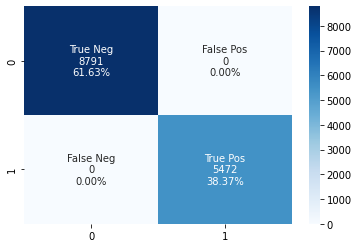

In [66]:
model_evaluation(classifier_rf)

**Red Neuronal**

In [71]:
# Dividir el conjunto de datos para entrenar y probar Red Neuronal

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [72]:
X_train

array([[-1.02410087, -1.21852388, -1.47905714,  0.50629845],
       [-1.02410087,  1.19255792,  0.48059825, -0.90911028],
       [-1.02410087,  1.19255792,  0.9705121 , -0.90911028],
       ...,
       [-1.02410087,  2.39809881,  0.9705121 , -0.90911028],
       [-1.02410087,  1.19255792,  0.9705121 , -0.90911028],
       [ 0.97646631,  1.19255792,  0.9705121 , -0.90911028]])

In [73]:
X_test

array([[ 0.97646631,  2.39809881,  0.9705121 , -0.90911028],
       [ 0.97646631, -1.21852388, -0.0093156 ,  1.92170717],
       [-1.02410087, -1.21852388, -1.47905714,  0.50629845],
       ...,
       [-1.02410087,  1.19255792, -0.0093156 ,  1.92170717],
       [-1.02410087, -0.01298298,  1.46042594, -0.90911028],
       [-1.02410087, -1.21852388, -0.0093156 ,  1.92170717]])

**Construimos la Red Neuronal Artificial**

In [74]:
import tensorflow as tf

In [75]:
#Initializing the ANN
ann = tf.keras.models.Sequential()

#Adding the Layers
ann.add(tf.keras.layers.Dense(units=500, activation='relu'))
ann.add(tf.keras.layers.Dense(units=500, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#Training the ANN
ann.fit(X_train, y_train, batch_size = 32, epochs =30) # epochs =250

#Storing the predicted Values
y_pred = ann.predict(X_test)

Epoch 1/30
1189/1189 [==============================] - 8s 6ms/step - loss: 0.0047 - accuracy: 0.9988
Epoch 2/30
1189/1189 [==============================] - 7s 6ms/step - loss: 1.2064e-06 - accuracy: 1.0000
Epoch 3/30
1189/1189 [==============================] - 7s 6ms/step - loss: 3.2587e-07 - accuracy: 1.0000
Epoch 4/30
1189/1189 [==============================] - 8s 7ms/step - loss: 1.3204e-07 - accuracy: 1.0000
Epoch 5/30
1189/1189 [==============================] - 7s 6ms/step - loss: 6.2891e-08 - accuracy: 1.0000
Epoch 6/30
1189/1189 [==============================] - 7s 6ms/step - loss: 3.2141e-08 - accuracy: 1.0000
Epoch 7/30
1189/1189 [==============================] - 7s 6ms/step - loss: 1.7907e-08 - accuracy: 1.0000
Epoch 8/30
1189/1189 [==============================] - 8s 7ms/step - loss: 1.0569e-08 - accuracy: 1.0000
Epoch 9/30
1189/1189 [==============================] - 7s 6ms/step - loss: 6.2804e-09 - accuracy: 1.0000
Epoch 10/30
1189/1189 [===========================

### **8) - ANALISIS DE LA VARIABLE TARGET "CALIFICACION CREDITICIA"**

---

En esta segunda etapa, realizamos el analisis de riesgo crediticio con el objetivo de obtener una Calificacion de Riesgo en complementacion al Analisis de Viabilidad (Default) realizado en la etapa anterior.

Se utilizara un escala numerica del 1 al 7, donde el rango del 1 al 3 corresponde a **personas en default**, y desde el rango de 4 a 7 corresponde a personas en **situacion normal (no default)**

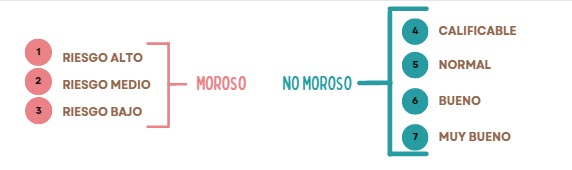

Para este analisis utilizamos como:

* **Variables predictoras (X):**  A las columnas: **Default', 'Riesgo', 'Genero', 'Producto', 'Scoring'**
* **Variable target (Y):**  A la columna: **'Calificacion'**

### **9) - DETALLE DE LOS MODELOS A APLICAR**

---

Utilizaremos modelos de clasificación y clustering. En específico se seleccionan:

    9.1. Regresion Logistica
    9.2. Arbol de Decision
    9.3. Random Forest
    9.4. KNN
    9.5. Gaussian Naive Bayes
    9.6. GradientBoostingClassifier
    9.7. XGB Classifier model

* La **Regresion Logistica** Es un tipo de análisis de regresión utilizado para predecir el resultado de una variable categórica en función de las variables independientes o predictoras.

* Los **Arboles de Decisión** Son modelos predictivos formados por reglas binarias (si/no) con las que se consigue repartir las observaciones en función de sus atributos y predecir así el valor de la variable respuesta.

* El modelo **Random Forest** Es una combinación de árboles predictores tal que cada árbol depende de los valores de un vector aleatorio probado independientemente y con la misma distribución para cada uno de estos.

* El algoritmo **KNN**  Consiste en la predicción de un valor desconocido a partir de las características de los datos más cercanos. Se optimiza, ajustando los parámetros de distancia y la cantidad de vecinos.

* El modelo **Gaussian Naive Bayes** Es un clasificador probabilístico simple con fuerte suposición de independencia. El clasificador Naïve-Bayes aprende de los datos de entrenamiento y luego predice la clase de la instancia de prueba con la mayor probabilidad posterior.

* Un modelo **Gradient Boosting** Está formado por un conjunto de árboles de decisión individuales, entrenados de forma secuencial, de forma que cada nuevo árbol trata de mejorar los errores de los árboles anteriores. La predicción de una nueva observación se obtiene agregando las predicciones de todos los árboles individuales que forman el modelo.

* El modelo **XGBClassifier model** Es un algoritmo de aprendizaje automático basado en un árbol de decisiones y utiliza un marco de potenciación de gradientes.

In [83]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

## scikit modeling libraries
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

## Predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.feature_selection import RFE

#Principal components & otros
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import (cross_val_score, KFold, train_test_split)
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

### **10) - ENTRENAMIENTO DEL MODELO**

---

**División de los datos en entrenamiento y prueba**

In [ ]:
# Asignamos nuestras variables predictoras y variable objetivo

# Definición de variables predictoras (X)
x = df[['Default', 'Riesgo', 'Genero', 'Producto', 'Scoring']] 
print(x)

# Definición de variable objetivo (y)
y = df["Calificacion"]
print(y)

In [77]:
# Dividiendo el dataset en entrenamiento y evaluacion
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [78]:
print('El conjunto de entrenamiento tiene: {} datos \nEl set de evaluación tiene: {} datos'.
      format(X_train.shape[0], X_test.shape[0]))

El conjunto de entrenamiento tiene: 38033 datos 
El set de evaluación tiene: 9509 datos


In [79]:
# Creo un _performance_auc_ dict para la comparación de los modelos
performance_auc = {}

**10.1) -Logístic Regression**

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [81]:
model = LogisticRegression().fit(X_train, Y_train)
predicted_log = model.predict(X_test)
predicted_log

# Confidence score
logreg_score_1 = round(model.score(X_train, Y_train) * 100, 2)

In [84]:
target_names = ['Riesgo Alto', 'Riesgo Medio', 'Riesgo Bajo', 'Calificable', 'Normal', 'Bueno', 'Muy Bueno']
print(classification_report(Y_test, predicted_log, target_names=target_names))

              precision    recall  f1-score   support

 Riesgo Alto       1.00      1.00      1.00      2083
Riesgo Medio       1.00      1.00      1.00       559
 Riesgo Bajo       1.00      1.00      1.00       910
 Calificable       0.97      1.00      0.99      1169
      Normal       0.47      0.65      0.55      2027
       Bueno       0.42      0.47      0.44      1740
   Muy Bueno       0.00      0.00      0.00      1021

    accuracy                           0.72      9509
   macro avg       0.69      0.73      0.71      9509
weighted avg       0.67      0.72      0.69      9509



In [85]:
# Exactitud del modelo
print("Exactitud del modelo Regresion Logistica es de: ", metrics.accuracy_score(Y_test, predicted_log))

Exactitud del modelo Regresion Logistica es de:  0.7215269744452624


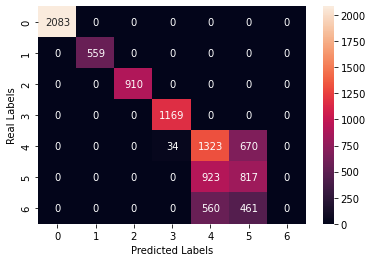

In [86]:
# Plot Confusion Matrix

sns.heatmap(confusion_matrix(Y_test, predicted_log), annot=True, fmt='.0f')
plt.ylabel('Real Labels')
plt.xlabel('Predicted Labels');

**10.2) -Decisión Tree**

In [87]:
model = DecisionTreeClassifier().fit(X_train, Y_train)
model

DecisionTreeClassifier()

In [88]:
predicted_dt = model.predict(X_test)
predicted_dt

array([6, 4, 1, ..., 4, 6, 4])

In [89]:
# Confidence score
dectree_score_1 = round(model.score(X_train, Y_train) * 100, 2)
target_names = ['Riesgo Alto', 'Riesgo Medio', 'Riesgo Bajo', 'Calificable', 'Normal', 'Bueno', 'Muy Bueno']
print(classification_report(Y_test, predicted_dt, target_names=target_names))

              precision    recall  f1-score   support

 Riesgo Alto       1.00      1.00      1.00      2083
Riesgo Medio       1.00      1.00      1.00       559
 Riesgo Bajo       1.00      1.00      1.00       910
 Calificable       0.97      1.00      0.99      1169
      Normal       0.64      0.35      0.45      2027
       Bueno       0.39      0.82      0.53      1740
   Muy Bueno       0.56      0.00      0.01      1021

    accuracy                           0.72      9509
   macro avg       0.79      0.74      0.71      9509
weighted avg       0.76      0.72      0.69      9509



In [90]:
# Exactitud del modelo
print("Exactitud del modelo Decision Tree es de: ", metrics.accuracy_score(Y_test, predicted_dt))

Exactitud del modelo Decision Tree es de:  0.7211063203281102


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

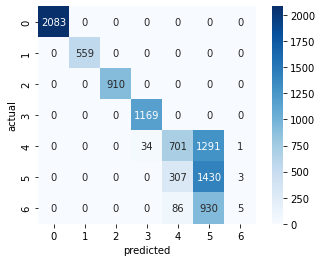

In [91]:
# Create a confusion matrix
matrix = confusion_matrix(Y_test, predicted_dt)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

**10.3) - Random Forest**

In [92]:
model = RandomForestClassifier(n_estimators=300, random_state=0).fit(X_train, Y_train)
model

RandomForestClassifier(n_estimators=300, random_state=0)

In [93]:
predicted_rf = model.predict(X_test)
predicted_rf

array([6, 4, 1, ..., 4, 6, 4])

In [94]:
# Confidence score
randfor_score_1 = round(model.score(X_train,Y_train) * 100, 2)
target_names = ['Riesgo Alto', 'Riesgo Medio', 'Riesgo Bajo', 'Calificable', 'Normal', 'Bueno', 'Muy Bueno']
print(classification_report(Y_test, predicted_rf, target_names=target_names))

              precision    recall  f1-score   support

 Riesgo Alto       1.00      1.00      1.00      2083
Riesgo Medio       1.00      1.00      1.00       559
 Riesgo Bajo       1.00      1.00      1.00       910
 Calificable       0.97      1.00      0.99      1169
      Normal       0.64      0.35      0.45      2027
       Bueno       0.39      0.82      0.53      1740
   Muy Bueno       0.56      0.00      0.01      1021

    accuracy                           0.72      9509
   macro avg       0.79      0.74      0.71      9509
weighted avg       0.76      0.72      0.69      9509



In [95]:
# Exactitud del modelo
print("Exactitud del modelo Random Forest es de: ", metrics.accuracy_score(Y_test, predicted_rf))

Exactitud del modelo Random Forest es de:  0.7211063203281102


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

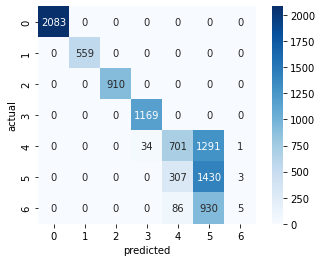

In [96]:
matrix = confusion_matrix(Y_test, predicted_rf)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

**10.4) - k-Nearest Neighbors (KNN)** 

In [97]:
model = KNeighborsClassifier(3).fit(X_train, Y_train)
model

KNeighborsClassifier(n_neighbors=3)

In [98]:
predicted_knn = model.predict(X_test)
predicted_knn

array([6, 4, 1, ..., 4, 5, 4])

In [99]:
# Confidence score
knn_score_1 = round(model.score(X_train,Y_train) * 100, 2)
target_names = ['Riesgo Alto', 'Riesgo Medio', 'Riesgo Bajo', 'Calificable', 'Normal', 'Bueno', 'Muy Bueno']
print(classification_report(Y_test, predicted_knn, target_names=target_names))

              precision    recall  f1-score   support

 Riesgo Alto       1.00      1.00      1.00      2083
Riesgo Medio       1.00      1.00      1.00       559
 Riesgo Bajo       1.00      1.00      1.00       910
 Calificable       0.97      1.00      0.99      1169
      Normal       0.52      0.51      0.52      2027
       Bueno       0.40      0.42      0.41      1740
   Muy Bueno       0.25      0.22      0.23      1021

    accuracy                           0.71      9509
   macro avg       0.73      0.74      0.73      9509
weighted avg       0.70      0.71      0.70      9509



In [100]:
# Exactitud del modelo
print("Exactitud del modelo KNeighborsClassifier es de: ", metrics.accuracy_score(Y_test, predicted_knn))

Exactitud del modelo KNeighborsClassifier es de:  0.7058576085813439


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

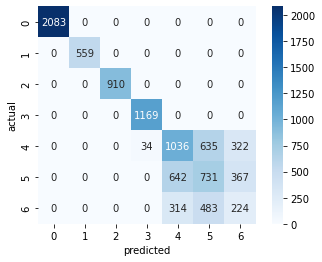

In [101]:
matrix = confusion_matrix(Y_test, predicted_knn)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

**10.5) - Gaussian Naive Bayes**

In [102]:
model = GaussianNB().fit(X_train, Y_train)
model

GaussianNB()

In [103]:
predicted_gau = model.predict(X_test)
predicted_gau

array([6, 4, 1, ..., 4, 6, 4])

In [104]:
# Confidence score
gau_score_1 = round(model.score(X_train,Y_train) * 100, 2)
target_names = ['Riesgo Alto', 'Riesgo Medio', 'Riesgo Bajo', 'Calificable', 'Normal', 'Bueno', 'Muy Bueno']
print(classification_report(Y_test, predicted_gau, target_names=target_names))

              precision    recall  f1-score   support

 Riesgo Alto       1.00      1.00      1.00      2083
Riesgo Medio       1.00      1.00      1.00       559
 Riesgo Bajo       1.00      1.00      1.00       910
 Calificable       0.97      1.00      0.99      1169
      Normal       0.00      0.00      0.00      2027
       Bueno       0.37      1.00      0.54      1740
   Muy Bueno       0.00      0.00      0.00      1021

    accuracy                           0.68      9509
   macro avg       0.62      0.71      0.65      9509
weighted avg       0.56      0.68      0.59      9509



In [105]:
# Exactitud del modelo
print("Exactitud del modelo GaussianNB es de: ", metrics.accuracy_score(Y_test, predicted_gau))

Exactitud del modelo GaussianNB es de:  0.6794615627300452


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

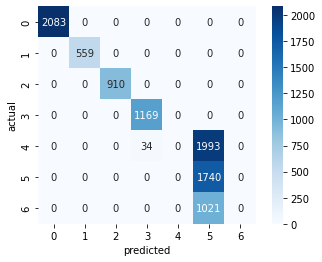

In [106]:
matrix = confusion_matrix(Y_test, predicted_gau)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

**10.6) - GradientBoosting Classifier**

In [107]:
model = GradientBoostingClassifier().fit(X_train, Y_train)
model

GradientBoostingClassifier()

In [108]:
predicted_gbc = model.predict(X_test)
predicted_gbc

array([6, 4, 1, ..., 4, 6, 4])

In [109]:
# Confidence score
gbc_score_1 = round(model.score(X_train,Y_train) * 100, 2)
target_names = ['Riesgo Alto', 'Riesgo Medio', 'Riesgo Bajo', 'Calificable', 'Normal', 'Bueno', 'Muy Bueno']
print(classification_report(Y_test, predicted_gbc, target_names=target_names))

              precision    recall  f1-score   support

 Riesgo Alto       1.00      1.00      1.00      2083
Riesgo Medio       1.00      1.00      1.00       559
 Riesgo Bajo       1.00      1.00      1.00       910
 Calificable       0.97      1.00      0.99      1169
      Normal       0.64      0.35      0.45      2027
       Bueno       0.39      0.82      0.53      1740
   Muy Bueno       0.56      0.00      0.01      1021

    accuracy                           0.72      9509
   macro avg       0.79      0.74      0.71      9509
weighted avg       0.76      0.72      0.69      9509



In [110]:
# Exactitud del modelo
print("Exactitud del modelo GradientBoostingClassifier es de: ", metrics.accuracy_score(Y_test, predicted_gbc))

Exactitud del modelo GradientBoostingClassifier es de:  0.7211063203281102


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

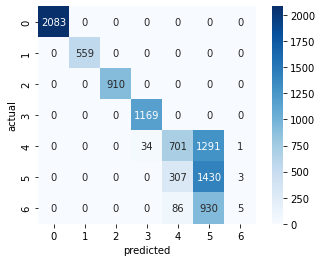

In [111]:
matrix = confusion_matrix(Y_test, predicted_gbc)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

**10.7)  -XGBClassifier model**

In [112]:
model = XGBClassifier().fit(X_train, Y_train)
model

XGBClassifier(objective='multi:softprob')

In [113]:
predicted_xgb = model.predict(X_test)
predicted_xgb

array([6, 4, 1, ..., 4, 6, 4])

In [114]:
# Confidence score
xgb_score_1 = round(model.score(X_train,Y_train) * 100, 2)
target_names = ['Riesgo Alto', 'Riesgo Medio', 'Riesgo Bajo', 'Calificable', 'Normal', 'Bueno', 'Muy Bueno']
print(classification_report(Y_test, predicted_xgb, target_names=target_names))

              precision    recall  f1-score   support

 Riesgo Alto       1.00      1.00      1.00      2083
Riesgo Medio       1.00      1.00      1.00       559
 Riesgo Bajo       1.00      1.00      1.00       910
 Calificable       0.97      1.00      0.99      1169
      Normal       0.64      0.35      0.45      2027
       Bueno       0.39      0.82      0.53      1740
   Muy Bueno       0.56      0.00      0.01      1021

    accuracy                           0.72      9509
   macro avg       0.79      0.74      0.71      9509
weighted avg       0.76      0.72      0.69      9509



In [115]:
# Exactitud del modelo
print("Exactitud del modelo XGBClassifier es de: ", metrics.accuracy_score(Y_test, predicted_xgb))

Exactitud del modelo XGBClassifier es de:  0.7211063203281102


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

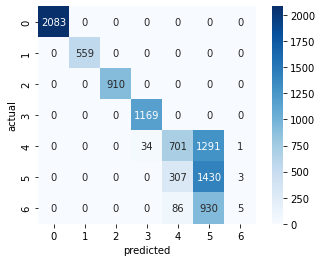

In [116]:
matrix = confusion_matrix(Y_test, predicted_xgb)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

**10.8) - Analisis comparativos de modelos y evaluación**

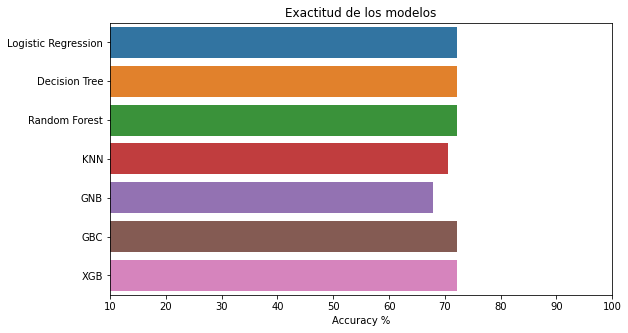

In [117]:
plt.figure(figsize=(9,5))
acc = [metrics.accuracy_score(Y_test, predicted_log),
metrics.accuracy_score(Y_test, predicted_dt),
metrics.accuracy_score(Y_test, predicted_rf),
metrics.accuracy_score(Y_test, predicted_knn),
metrics.accuracy_score(Y_test, predicted_gau),
metrics.accuracy_score(Y_test, predicted_gbc),
metrics.accuracy_score(Y_test, predicted_xgb)]
models = ["Logistic Regression", "Decision Tree", "Random Forest", "KNN", "GNB", "GBC", "XGB"]
acc_ = np.array(acc)*100
sns.barplot(acc_, models)
plt.title("Exactitud de los modelos")
plt.xlim([10,100])
plt.xlabel("Accuracy %")
plt.show()

### **11) - CONCLUSION**